## Batch reactor

![title](Image\Batch_reactor.jpg)

**Batch reactors** are used for most of the reactions carried out in a laboratory. It doesn't have flow **in** or **out** the system, thus the **mass balance** of this kind of reactor depends only the rate of mass accumulated, generated and consumed.

In some times, is possible to combine knownledge of reactor plus optimization to find optimal operational parameter. In this context, let's find the optimum residance time in order to obtain maximum production of component B:

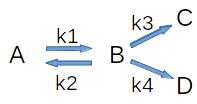

The inital concentrations and conversion rates are:

* $ C_{A0} = 50 gmol/L \quad k_1 = 2.0h^{-1} $;
* $ C_{B0} = 5 gmol/L \quad k_1 = 1.0h^{-1} $;
* $ C_{C0} = 0 gmol/L \quad k_1 = 0.2h^{-1} $;
* $ C_{D0} = 0 gmol/L \quad k_1 = 0.6h^{-1} $;

For this problem we must assume some hypotesis:

* Isotermic system;
* Batch reactor perfectly stirred;
* Constant volume (liquid phase only);
* First order reactions;

With mass balance for each component we can take the following ordinary differential equations (ODE):

$ \begin{cases} \frac{\partial C_A}{\partial t} = K_2C_B - K_1C_A \\
 \frac{\partial C_B}{\partial t} = K_1C_A - (K_2+K_3+K_4)C_B \\
 \frac{\partial C_C}{\partial t} = K_3C_B \\
 \frac{\partial C_D}{\partial t} = K_4C_B \end{cases}$
 
Next step is to organize the system above into a ODE in terms of $C_B$:

$ \frac{\partial^2 C_B}{\partial t^2}+(K_1+K_2+K_3+K_4)\frac{\partial C_B}{\partial t}+K_1(K_3+K_4)C_B=0 $

For this 2º order linear ODE the solution is given by:

$ C_B(t) = ae^{\beta_1f} + be^{\beta_2f} $

Where:

* $ a = 38.01 $;
* $ b = -33.01 $;
* $ \beta_1 = -0.485 $;
* $ \beta_2 = -3.315 $;

Thus the above equation will be used in order to achieve the optimum **residence time** to maximize production of $ C_B$. So, **let's do it**

In [6]:
from scipy.optimize import minimize
import numpy as np

### Definition of the function

In [10]:
def func (x):
    
    f =  -(38.01*(np.exp((-0.485*x)))- 33.01*(np.exp((-3.315*x))))  
    
    return f

### Optimization

In [11]:
solution = minimize(func, x0 = 0, method = 'CG')

### Optimization results

In [12]:
solution

     fun: array([-23.91341642])
     jac: array([4.76837158e-07])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 1
    njev: 9
  status: 0
 success: True
       x: array([0.62933756])

In [15]:
Cb = func(solution.x)
print("The optimal concentration of B: ",abs(Cb[0]))
print("")
print("Optimal residence time: ",solution.x[0])

The optimal concentration of B:  23.913416419241656

Optimal residence time:  0.6293375562413439
